
EC9630 Machine Learning - Laboratory 02

Task: LINEAR REGRESSION

Name: Lakshan W.G.

Reg No: 2020/E/079

Date: 24 July 2024

Time: 08.00 a.m

**Import Libraries and Download Dataset**

In [20]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import requests
import io
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Download the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip'
response = requests.get(url)

# Extract the ZIP file
with ZipFile(io.BytesIO(response.content)) as z:
    z.extractall()


**Load and Inspect the Dataset**

In [21]:
# Load the dataset
data = pd.read_csv('hour.csv')

# Display the first few rows and dataset info
print("First few rows of the dataset:")
print(data.head())
print("\nDataset information:")
print(data.info())


First few rows of the dataset:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeInd

**Data Preprocessing**

In [22]:
# Drop unnecessary columns
# Reason: Columns 'instant', 'dteday', 'casual', 'registered' are not useful for the model as 'instant' is just an index, 'dteday' is the date.
data = data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

# Check for missing values
# Reason: It's important to check for missing values to handle them appropriately. Missing data can lead to inaccurate models.
print("\nMissing values in each column:")
print(data.isnull().sum())



Missing values in each column:
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


**Split Data into Features and Target Variable**

In [23]:
# Split the data into features and target variable
X = data.drop('cnt', axis=1)
y = data['cnt']


**Standardize the Features**

In [24]:
# Standardize the features
# Reason: Standardizing the features helps in normalizing the data, which is beneficial for many machine learning algorithms.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Split Data into Training and Testing Sets**

In [25]:
# Split the data into training and testing sets
# Reason: Splitting the data helps in training the model on one part of the data and testing it on another part,
# ensuring that the model generalizes well to unseen data.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("\nPreprocessing completed. Ready for model training.")



Preprocessing completed. Ready for model training.


**Fit the Linear Regression Model**

In [26]:
# Fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

# Calculate error metrics for Linear Regression
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

print("\nError metrics for Linear Regression:")
print(f"Mean Absolute Error (MAE): {mae_linear}")
print(f"Mean Squared Error (MSE): {mse_linear}")
print(f"Root Mean Squared Error (RMSE): {rmse_linear}")



Error metrics for Linear Regression:
Mean Absolute Error (MAE): 104.80335089554427
Mean Squared Error (MSE): 19379.828367651728
Root Mean Squared Error (RMSE): 139.2114519989348


**Implement Recursive Least Squares (RLS)**

In [27]:
# Recursive Least Squares Algorithm
def recursive_least_squares(X, y, lambda_factor=0.99):
    n_samples, n_features = X.shape
    theta = np.zeros(n_features, dtype=float)  # Initial parameter estimates as float
    P = np.eye(n_features) * 1000.0  # Initial covariance matrix as float

    for i in range(n_samples):
        x_t = X[i].reshape(-1, 1)  # Current input vector, reshaped to column vector
        y_t = y[i]  # Current target value

        # Gain vector
        x_t_T = x_t.T  # Transpose of x_t
        P_x_t = P @ x_t  # Intermediate computation
        gain_denominator = lambda_factor + (x_t_T @ P_x_t)[0, 0]  # Scalar value

        # Compute the gain vector K_t
        K_t = P_x_t / gain_denominator

        # Parameter update
        error = y_t - (x_t_T @ theta)[0]  # Prediction error (scalar)
        theta = theta + (K_t.flatten() * error)

        # Covariance matrix update
        P = (1 / lambda_factor) * (P - K_t @ x_t_T @ P)

    return theta

# Fit the RLS model
theta_rls = recursive_least_squares(X_train, y_train.to_numpy())

# Predict on the test set using the estimated parameters
y_pred_rls = X_test @ theta_rls

# Calculate Error Metrics for RLS
mae_rls = mean_absolute_error(y_test, y_pred_rls)
mse_rls = mean_squared_error(y_test, y_pred_rls)
rmse_rls = np.sqrt(mse_rls)

print("\nRecursive Least Squares - Error Metrics:")
print(f"Mean Absolute Error (MAE): {mae_rls}")
print(f"Mean Squared Error (MSE): {mse_rls}")
print(f"Root Mean Squared Error (RMSE): {rmse_rls}")

# Analyze Coefficients
print("\nEstimated Coefficients (RLS):")
print(theta_rls)



Recursive Least Squares - Error Metrics:
Mean Absolute Error (MAE): 188.43386949236697
Mean Squared Error (MSE): 55620.04153987601
Root Mean Squared Error (RMSE): 235.83901615270534

Estimated Coefficients (RLS):
[ 22.15172112  33.89605577   6.47941224  35.03844653   7.36399462
  18.65504709   9.80309281  22.4304892   -3.25878976  46.81720882
 -40.01995299  25.41926382]


**Compare Coefficients**


Coefficients comparison:
       Feature     Linear      Ridge      Lasso        RLS
0       season  22.711085  22.706113  22.041622  22.151721
1           yr  41.421894  41.419003  40.443599  33.896056
2         mnth   0.409857   0.413756   0.000000   6.479412
3           hr  52.980096  52.977097  52.245160  35.038447
4      holiday  -4.031614  -4.031691  -3.313930   7.363995
5      weekday   3.565437   3.564904   2.677735  18.655047
6   workingday   1.817077   1.816990   0.992967   9.803093
7   weathersit  -2.194970  -2.196450  -1.289791  22.430489
8         temp  19.071834  19.121462  20.898979  -3.258790
9        atemp  35.227053  35.176765  32.952026  46.817209
10         hum -38.482216 -38.479346 -38.325734 -40.019953
11   windspeed   4.219472   4.218237   3.080867  25.419264


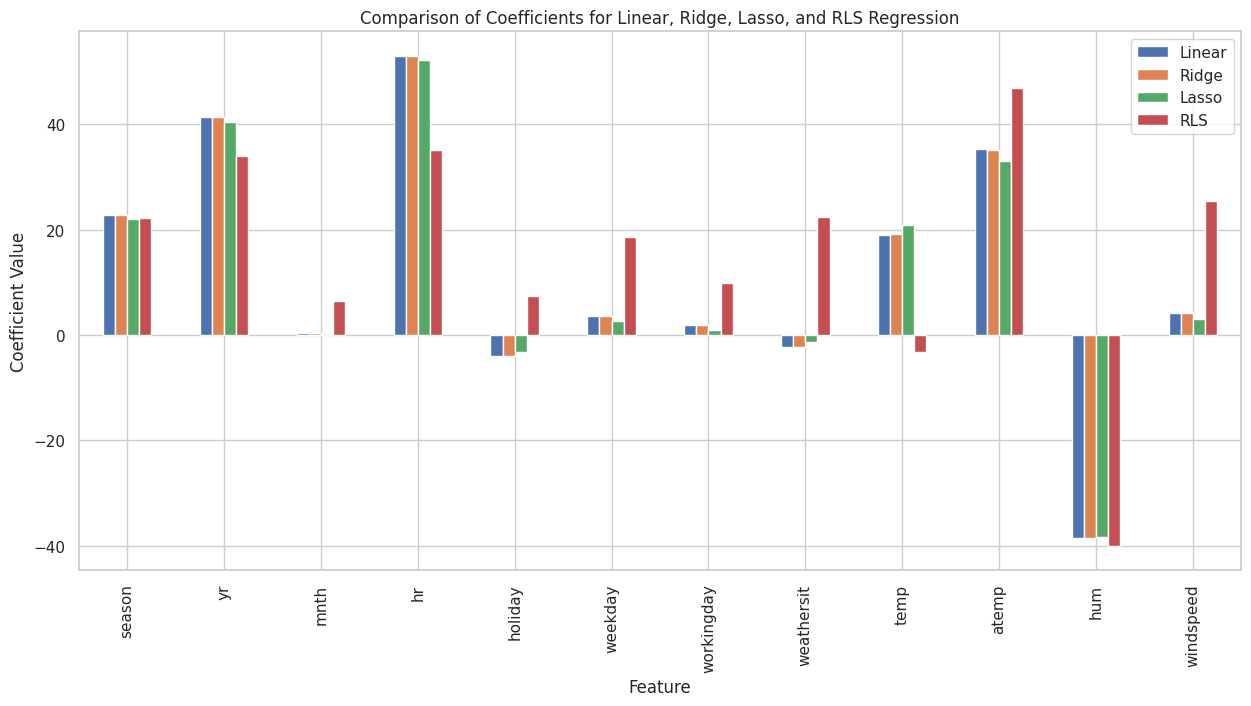

In [28]:
from sklearn.linear_model import Ridge, Lasso

# Fit Ridge and Lasso models
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=1.0)

ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Compare coefficients of the models
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Linear': linear_model.coef_,
    'Ridge': ridge_model.coef_,
    'Lasso': lasso_model.coef_,
    'RLS': theta_rls
})

print("\nCoefficients comparison:")
print(coefficients)

coefficients.set_index('Feature', inplace=True)
coefficients.plot(kind='bar', figsize=(15, 7))
plt.title('Comparison of Coefficients for Linear, Ridge, Lasso, and RLS Regression')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()


**Visualization**

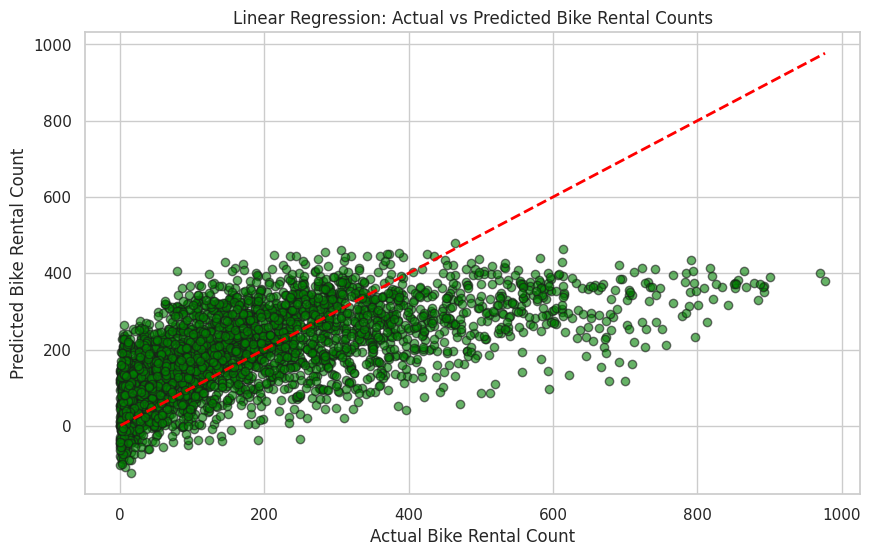

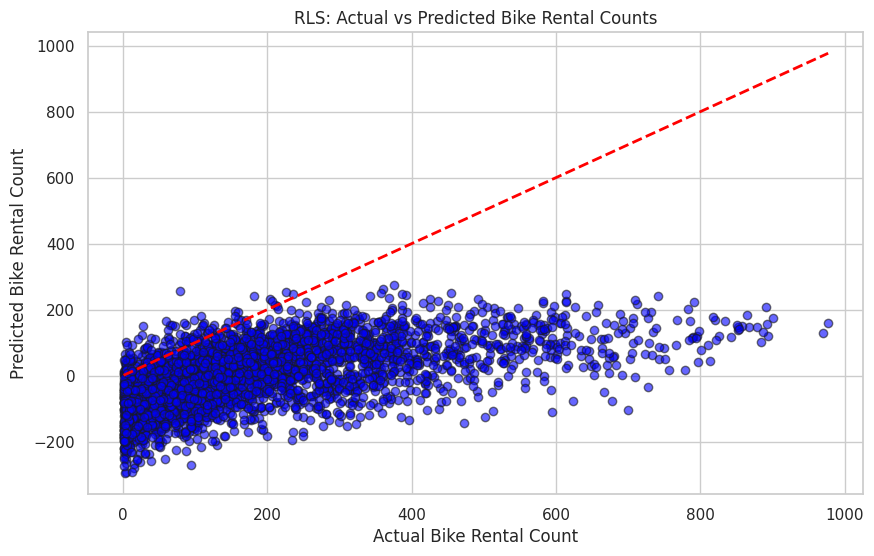

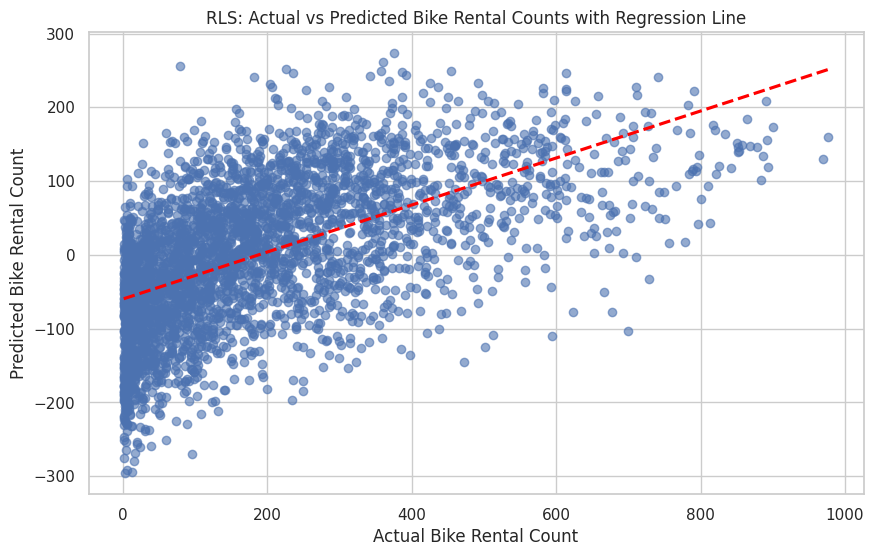

<Figure size 1500x700 with 0 Axes>

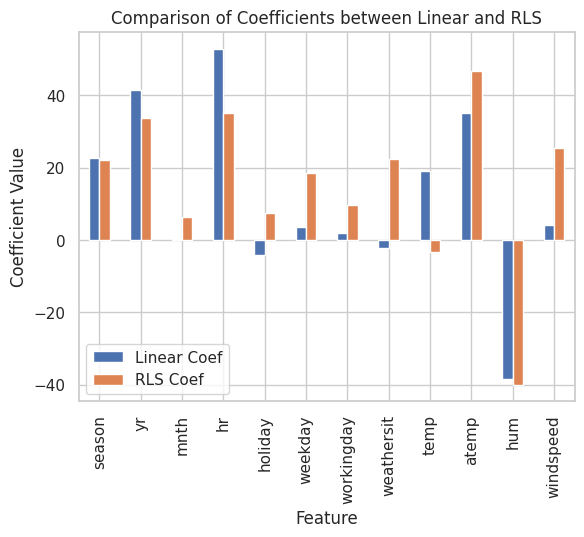

In [29]:
# Visualization for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='green', alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.xlabel('Actual Bike Rental Count')
plt.ylabel('Predicted Bike Rental Count')
plt.title('Linear Regression: Actual vs Predicted Bike Rental Counts')
plt.grid(True)
plt.show()

# Visualization for RLS
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rls, color='blue', alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.xlabel('Actual Bike Rental Count')
plt.ylabel('Predicted Bike Rental Count')
plt.title('RLS: Actual vs Predicted Bike Rental Counts')
plt.grid(True)
plt.show()

# Additional visualization with seaborn for RLS
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred_rls, ci=None, scatter_kws={"alpha": 0.6}, line_kws={"color": "red", "linestyle": "--"})
plt.xlabel('Actual Bike Rental Count')
plt.ylabel('Predicted Bike Rental Count')
plt.title('RLS: Actual vs Predicted Bike Rental Counts with Regression Line')
plt.grid(True)
plt.show()

# Plot Comparison of Coefficients
plt.figure(figsize=(15, 7))
coeff_df.set_index('Feature').plot(kind='bar')
plt.title('Comparison of Coefficients between Linear and RLS')
plt.ylabel('Coefficient Value')
plt.xlabel('Feature')
plt.grid(True)
plt.show()
